In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# load image from images directory
images = [
    "../img/kucing.jpg",
    "../img/gradient.png",
    "../img/Penguins.jpg",
    "../img/arizona.jpg",
    "../img/Tulips.jpg",
    "../img/Koala.jpg",
]

# Set up the subplot grid
rows = len(images)
cols = 4

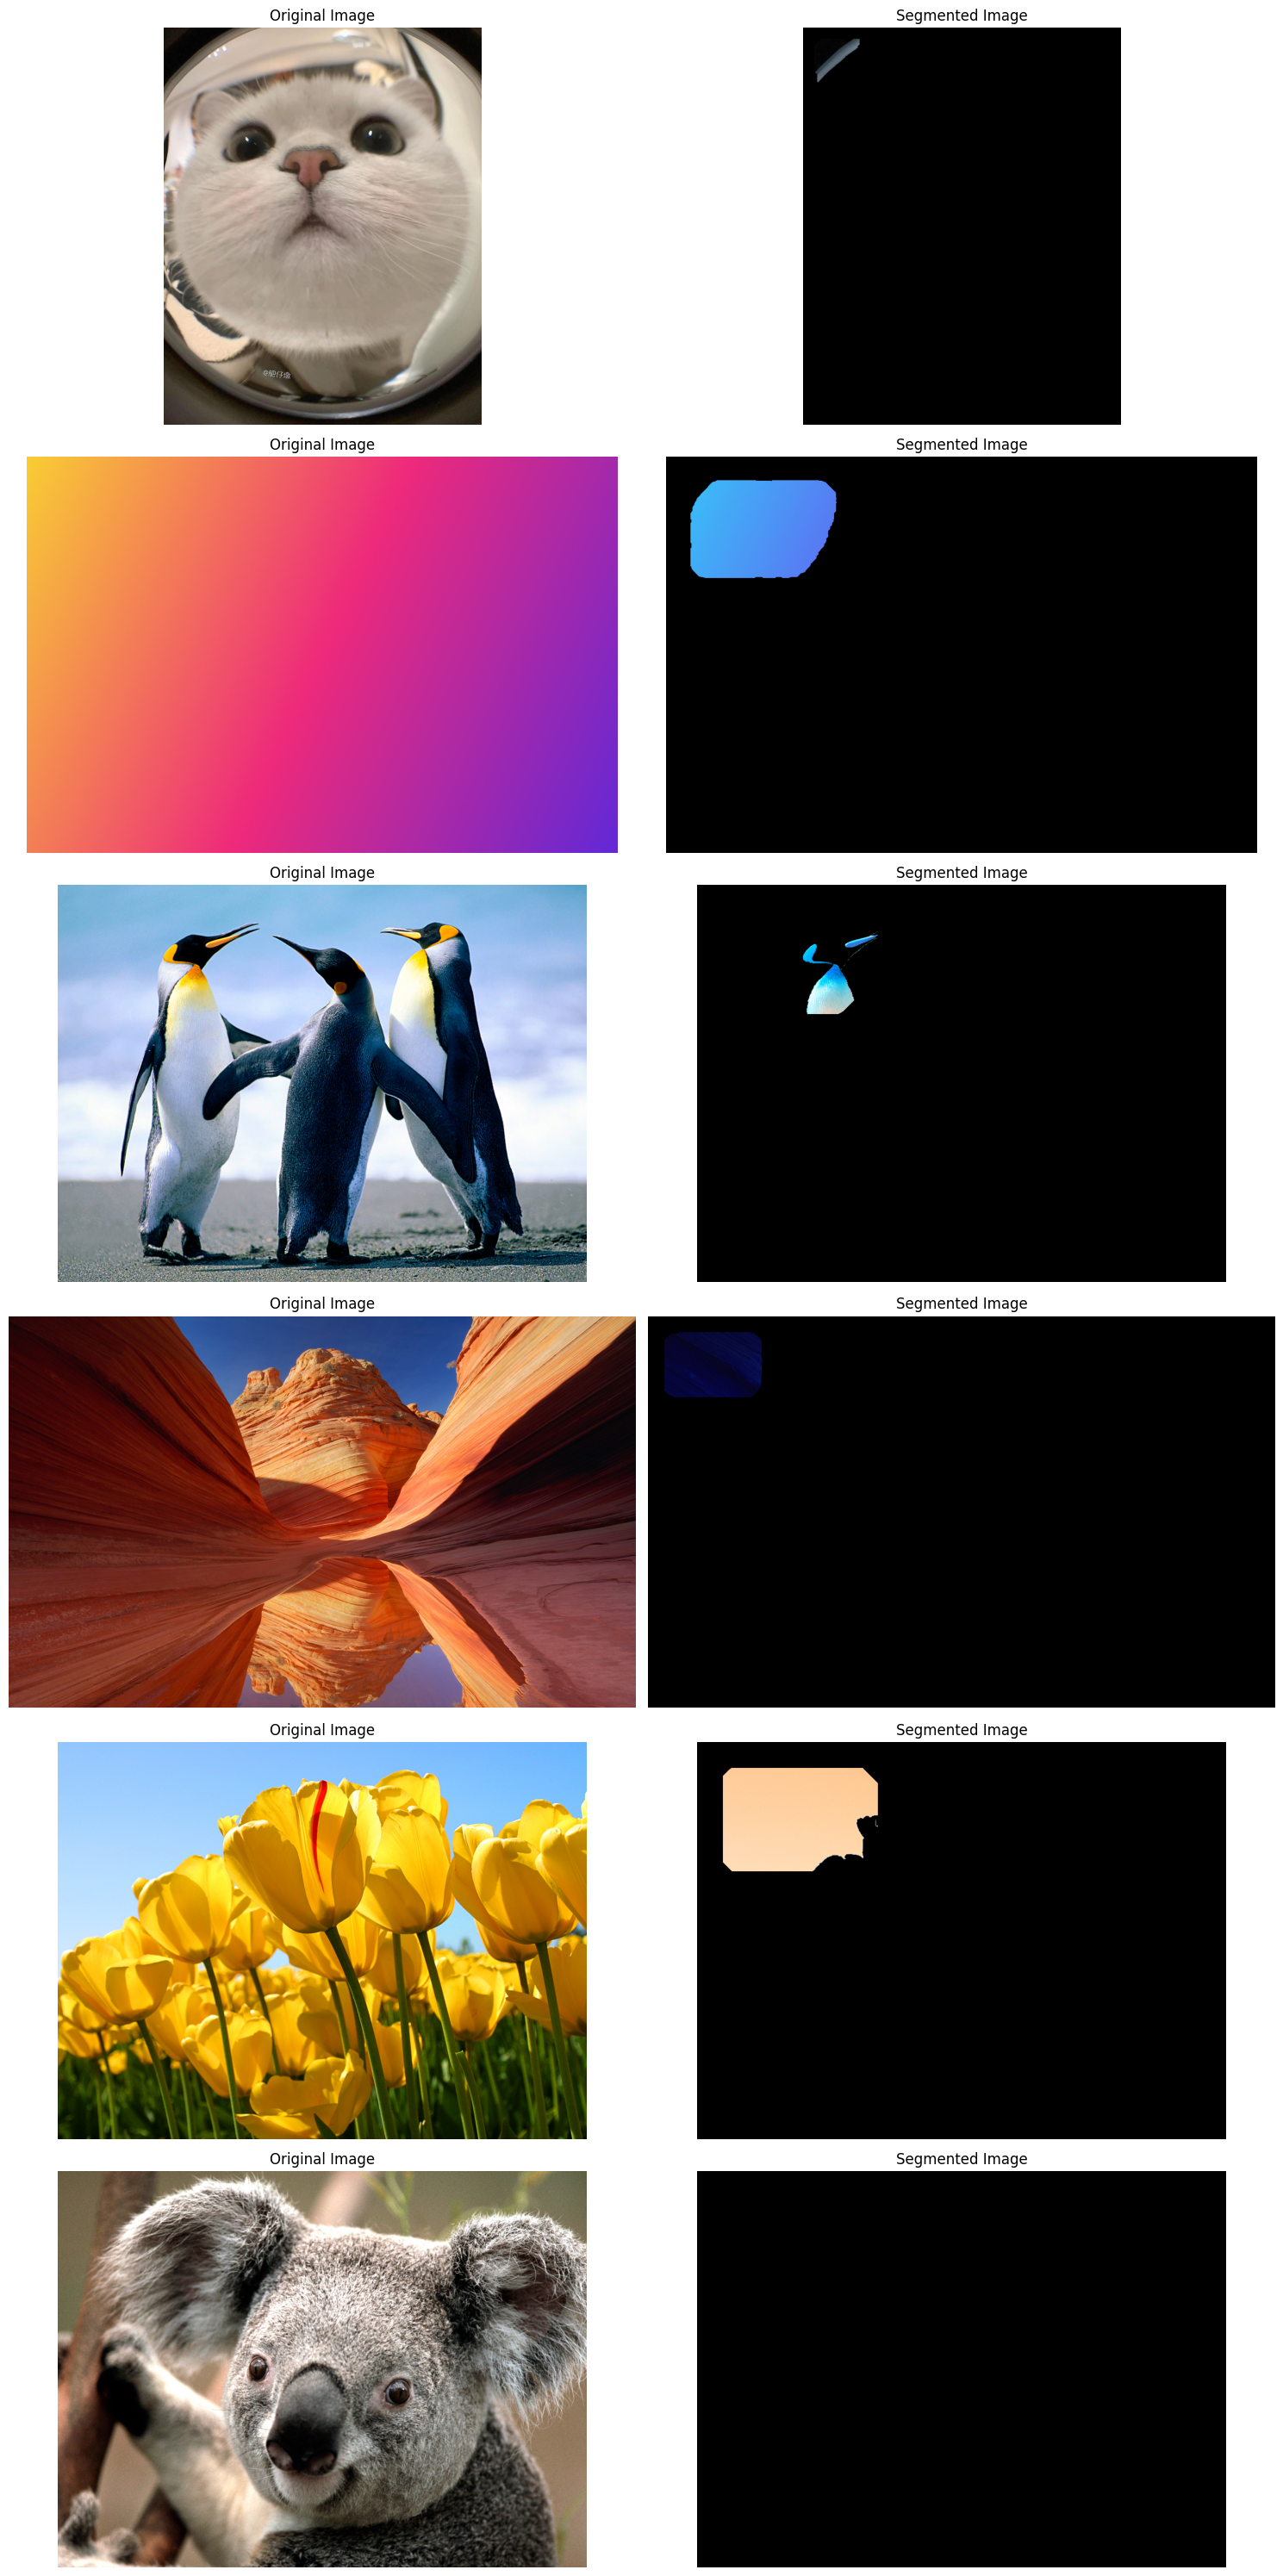

In [3]:
# Create a subplot for each image
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))

# Loop through each image
for i, imgFilename in enumerate(images):
    # Membaca data Image
    oriImg = cv2.imread(imgFilename)

    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    # Membaca data Image
    img = cv2.imread(imgFilename)

    # Create a mask (0: sure background, 2: sure foreground)
    mask = np.zeros(img.shape[:2], np.uint8)

    # Define a rectangle around the object of interest (rect = (start_x, start_y, width, height))
    rect = (50, 50, 300, 200)

    # Initialize the background and foreground models
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Apply GrabCut algorithm
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Modify the mask to get the segmented image
    segmentation_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
    segmented_image = img * segmentation_mask[:, :, np.newaxis]

    titles = [
        "Segmented Image",
    ]

    segmented_image = [segmented_image]

    for j in range(len(titles)):
        # Display the image
        axes[i, j + 1].imshow(segmented_image[j])
        axes[i, j + 1].set_title(f"{titles[j]}")
        axes[i, j + 1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()